In [1]:
%%js
window.R3UP = 
{
 author:'r3ki3g',
 activation_function:'sigmoid'
};

fetch('http://localhost:8888/files/PROJECTS/_r3_jupytor_js_ext/jq_and_code.js?download=1').then(response => response.text()).then(script => eval(script)).catch(error => alert(error));




<IPython.core.display.Javascript object>

## [Activation function used : {{activation_function}}]

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from random import sample


def percentage(x):return f"{round(100*x,4)}%"

In [3]:
# #generate data
# m = 10000
# x_train = np.random.rand(m)
# y_train = np.logical_and(x_train>0.5,x_train<0.75).astype(np.int16)

# x_y = np.hstack((x_train.reshape(-1,1),y_train.reshape(-1,1)))


# print(x_y)

### Generating an unbiased data set
We need to have %50 : 50%  positives:negatives

In [4]:
m = 100

pos_x = 0.25 + 0.5 * np.random.rand(m//2)
neg_x1 = 0 + 0.25 * np.random.rand(m//4)
neg_x2 = 0.75 + 0.25 * np.random.rand(m//4)
neg_x = np.concatenate((neg_x1,neg_x2))

x_train = np.concatenate((pos_x,neg_x))
y_train = np.logical_and(x_train>0.25,x_train<0.75).astype(np.int16)

x_y = np.hstack((x_train.reshape(-1,1),y_train.reshape(-1,1)))
print(x_y)

[[0.74693022 1.        ]
 [0.4489748  1.        ]
 [0.66485767 1.        ]
 [0.36555183 1.        ]
 [0.33964963 1.        ]
 [0.5955717  1.        ]
 [0.61894271 1.        ]
 [0.73412093 1.        ]
 [0.57084354 1.        ]
 [0.47465104 1.        ]
 [0.4515659  1.        ]
 [0.30514487 1.        ]
 [0.64477264 1.        ]
 [0.52979849 1.        ]
 [0.2585787  1.        ]
 [0.6005935  1.        ]
 [0.43366872 1.        ]
 [0.74878451 1.        ]
 [0.38986634 1.        ]
 [0.64685206 1.        ]
 [0.32259131 1.        ]
 [0.72370473 1.        ]
 [0.39410085 1.        ]
 [0.37916336 1.        ]
 [0.40048481 1.        ]
 [0.43176523 1.        ]
 [0.32575395 1.        ]
 [0.62990933 1.        ]
 [0.46795836 1.        ]
 [0.71522065 1.        ]
 [0.55388427 1.        ]
 [0.71847238 1.        ]
 [0.41995218 1.        ]
 [0.26651899 1.        ]
 [0.64463316 1.        ]
 [0.49836819 1.        ]
 [0.54970248 1.        ]
 [0.61520398 1.        ]
 [0.26118025 1.        ]
 [0.56186587 1.        ]


### Little visualization of the data (noiseless)

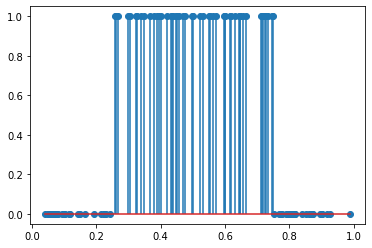

In [5]:
fig,ax = plt.subplots(1)
ax.stem(x_train,y_train)
plt.show()

### Noise to inputs

In [6]:
#introduce some noise in to x_train
PEAK_NOISE_FACTOR = 0
if 'need noise to x_train':
    noise =  PEAK_NOISE_FACTOR * (2*np.random.rand(len(x_train))-1)
    x_train += noise

### Little visualization of the data (with noise)

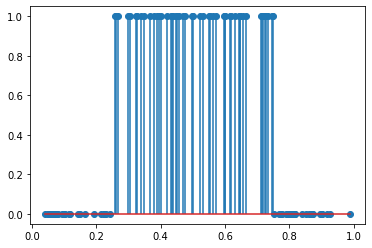

In [7]:
fig,ax = plt.subplots(1)
ax.stem(x_train,y_train)
plt.show()

### Train the weights

<font color='red'>
GUESSED_AMPLITUDE = 10 <br/>
    Initialize the params randomly [-10,10]<br/>
    (Because previous tuned params were in that scale)
</font>

In [8]:
x_train_all, y_train_all = x_train, y_train

def sigmoid(t):return 1/(1+np.exp(-t))


def fit():
    GUESSED_AMPLITUDE = 10
    w1,w2,b1,b2,theta1,theta2,k = (2*np.random.rand(7)-1) * GUESSED_AMPLITUDE

    print("initial:", w1,w2,b1,b2,theta1,theta2,k)
    n_iter = 3_00_000

    L_history = []
    x_train_indices = list(range(len(x_train_all)))

    for _ in range(n_iter):
        samples = sample(x_train_indices,99)
        x_train = x_train_all[samples]
        y_train = y_train_all[samples]


        z1 = sigmoid(w1*x_train+b1)
        z2 = sigmoid(w2*x_train+b2)
        A =  sigmoid(theta1*z1+theta2*z2+k)
        diff = y_train-A

        # L = log of joint likelihood
        L = (y_train * np.log(A) + (1-y_train) * np.log(1 -A)).sum()
        L_history.append(L)
        # need to maximize
        dL_dk = diff.sum()
        dL_dtheta1 = (diff * z1).sum()
        dL_dtheta2 = (diff * z2).sum()
        dL_db1 = (diff * theta1 * z1 * (1-z1) ).sum()
        dL_db2 = (diff * theta2 * z2 * (1 -z2) ).sum()
        dL_dw1 = (diff * theta1 * z1 * (1-z1) * x_train ).sum()
        dL_dw2 = (diff * theta2 * z2 * (1-z2) * x_train ).sum()


        #gradient accent
        lr = 1e-1/m

        w1 += lr * dL_dw1
        w2 += lr * dL_dw2
        b1 += lr * dL_db1
        b2 += lr * dL_db2
        theta1 += lr * dL_dtheta1
        theta2 += lr * dL_dtheta2
        k +=  lr * dL_dk



    print("final:", w1,w2,b1,b2,theta1,theta2,k)
    return w1,w2,b1,b2,theta1,theta2,k

    plt.plot(L_history,label='Joint Likekihood vs. Iterration')
    plt.show()

In [9]:
if 'need to run':
    z1 = sigmoid(w1*x_train+b1)
    z2 = sigmoid(w2*x_train+b2)
    A =  sigmoid(theta1*z1+theta2*z2+k)

    y_hat = (A>0.5)

    print("Accuracy:",percentage(np.sum(y_hat == y_train)/len(y_train)))
    if not 'need to run':

    x_set = [i/100 for i in range(0,100,4)]

    for x in x_set:
        z1 = sigmoid(w1*x+b1)
        z2 = sigmoid(w2*x+b2)
        A =  sigmoid(theta1*z1+theta2*z2+k)
        print(x , "is between 0.25 and 0.75: ------------>" , A>0.5, "( A= ", A, ")")
        #define a fit and evaluate combined function
def fit_and_evaluate4accuracy():
    w1,w2,b1,b2,theta1,theta2,k = fit()
    z1 = sigmoid(w1*x_train+b1)
    z2 = sigmoid(w2*x_train+b2)
    A =  sigmoid(theta1*z1+theta2*z2+k)

    y_hat = (A>0.5)

    accuracy = np.sum(y_hat == y_train)/len(y_train)
    return accuracy,(w1,w2,b1,b2,theta1,theta2,k)
    

### Results
Working super fine!\
Amazed by the accuracy:0.9992\
initial: -0.5076032176681249 -0.5161888079115744 -0.9797721258983405 0.3336572105934692 0.8192428213010876 0.8926597729557344 -0.9298152054573068
final: 21.743688970058535 -19.471327134725342 -5.59964282207095 14.43136556327099 16.785498226736504 16.844912960073945 -24.55654851478536

In [11]:
A = np.array([1,2,3,4,5])
A[[1,2,3]]

array([2, 3, 4])

## Using parallel processors to run the code multiple times then chose the best one

In [13]:
#parallely do multiple times
from joblib import Parallel, delayed
results = Parallel(n_jobs=30)((
                              delayed(fit_and_evaluate4accuracy)(),
                              delayed(fit_and_evaluate4accuracy)(),
                              delayed(fit_and_evaluate4accuracy)(),
                              delayed(fit_and_evaluate4accuracy)(),
                              delayed(fit_and_evaluate4accuracy)(),
    
                            delayed(fit_and_evaluate4accuracy)(),
                              delayed(fit_and_evaluate4accuracy)(),
                              delayed(fit_and_evaluate4accuracy)(),
                              delayed(fit_and_evaluate4accuracy)(),
                              delayed(fit_and_evaluate4accuracy)(),
    
                            delayed(fit_and_evaluate4accuracy)(),
                              delayed(fit_and_evaluate4accuracy)(),
                              delayed(fit_and_evaluate4accuracy)(),
                              delayed(fit_and_evaluate4accuracy)(),
                              delayed(fit_and_evaluate4accuracy)(),
    
                            delayed(fit_and_evaluate4accuracy)(),
                              delayed(fit_and_evaluate4accuracy)(),
                              delayed(fit_and_evaluate4accuracy)(),
                              delayed(fit_and_evaluate4accuracy)(),
                              delayed(fit_and_evaluate4accuracy)(),
    
                            delayed(fit_and_evaluate4accuracy)(),
                              delayed(fit_and_evaluate4accuracy)(),
                              delayed(fit_and_evaluate4accuracy)(),
                              delayed(fit_and_evaluate4accuracy)(),
                              delayed(fit_and_evaluate4accuracy)(),
    
                            delayed(fit_and_evaluate4accuracy)(),
                              delayed(fit_and_evaluate4accuracy)(),
                              delayed(fit_and_evaluate4accuracy)(),
                              delayed(fit_and_evaluate4accuracy)(),
                              delayed(fit_and_evaluate4accuracy)()
                              ))

C:\Users\R3KI3G\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [14]:
results


[(0.99,
  (-28.540226373186627,
   33.86366511134586,
   21.328512016135722,
   -8.629916570606786,
   25.052589852082452,
   24.466587598387726,
   -36.03016161706089)),
 (0.73,
  (40.14738557487072,
   -4.68460309791353,
   -7.73946834554222,
   -9.219760885749967,
   12.735647869893834,
   7.789971648561664,
   -12.046179122214845)),
 (0.99,
  (-22.01039121043974,
   -36.39982220001614,
   16.49491987146424,
   9.231852068996057,
   25.41380093336849,
   -24.32941480421682,
   -12.194424382506435)),
 (0.72,
  (-23.940343562415187,
   -9.886402540264962,
   3.6905145019850387,
   -8.628316443432018,
   -12.284806456916332,
   6.008587293599485,
   0.6772718292287812)),
 (0.73,
  (-40.051141740584036,
   3.9541237228219397,
   7.45213394481771,
   8.230597709336692,
   -16.26481223648812,
   6.132507679722787,
   -5.441438680064859)),
 (0.99,
  (-30.547312332594558,
   26.906713925209594,
   7.535192159422652,
   -20.338895885296182,
   -30.775692340660722,
   -31.190971895529444,
   

In [15]:
accuracy_array = []
for a,w in results:accuracy_array.append(a)
accuracy_array

[0.99,
 0.73,
 0.99,
 0.72,
 0.73,
 0.99,
 0.5,
 0.73,
 0.99,
 0.5,
 0.73,
 0.5,
 0.73,
 0.99,
 0.99,
 0.99,
 0.73,
 0.5,
 0.73,
 0.5,
 0.5,
 0.73,
 0.5,
 0.73,
 0.73,
 0.73,
 0.73,
 0.99,
 0.73,
 0.99]

In [16]:
max(accuracy_array)

0.99